# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [6]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick import datasets
X, y = datasets.loaders.load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [7]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)

# Step 3
# Decision Tree
dec_tree = DecisionTreeRegressor(max_depth=5, random_state=0)

# Random Forest Regressor
rand_forest = RandomForestRegressor(max_depth=5, random_state=0)

# Gradient Boosting Regressor
grad_boost = GradientBoostingRegressor(max_depth=5, random_state=0)


In [8]:
# Step 4 
def get_mse(model, X_train, y_train):
    model.fit(X_train, y_train)
    cv_results_train = cross_validate(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    train_scores = -1 * cv_results_train['train_score']
    test_scores = -1 * cv_results_train['test_score']
    return np.mean(train_scores), np.mean(test_scores)

dec_tree_train_mse, dec_tree_test_mse = get_mse(dec_tree, X_train, y_train)
rand_forest_train_mse, rand_forest_test_mse = get_mse(rand_forest, X_train, y_train)
grad_boost_train_mse, grad_boost_test_mse = get_mse(grad_boost, X_train, y_train)

# Step 5
results = pd.DataFrame({
    "Training": [dec_tree_train_mse, rand_forest_train_mse, grad_boost_train_mse],
    "Validation": [dec_tree_test_mse, rand_forest_test_mse, grad_boost_test_mse]
}, index=['Decision Tree', "Random Forest", "Gradient Boosting"] )

print(results)

                    Training  Validation
Decision Tree      47.279761   73.447331
Random Forest      29.577455   45.059351
Gradient Boosting   3.379440   22.783221


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [9]:
# TO DO: ADD YOUR CODE HERE

def get_r2(model, X_train, y_train):
    model.fit(X_train, y_train)
    cv_results_train = cross_validate(model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
    train_scores = cv_results_train['train_score']
    test_scores = cv_results_train['test_score']
    return np.mean(train_scores), np.mean(test_scores)

dec_tree_train_r2, dec_tree_test_r2 = get_r2(dec_tree, X_train, y_train)
rand_forest_train_r2, rand_forest_test_r2 = get_r2(rand_forest, X_train, y_train)
grad_boost_train_r2, grad_boost_test_r2 = get_r2(grad_boost, X_train, y_train)

results = pd.DataFrame({
    "Training": [dec_tree_train_r2, rand_forest_train_r2, grad_boost_train_r2],
    "Validation": [dec_tree_test_r2, rand_forest_test_r2, grad_boost_test_r2]
}, index=['Decision Tree', "Random Forest", "Gradient Boosting"] )

print(results)

                   Training  Validation
Decision Tree      0.834465    0.738697
Random Forest      0.896557    0.840927
Gradient Boosting  0.988171    0.919471


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. From the previous assignment, using Linear Regression I got training and test scores: mse: [110, 95], r2: [0.6, 0.62]. The non-linear models used in this assignment produced training scores of: mse: DT = [47.28, 73.44], RF = [29.58, 45.06], GB = [3.38, 22.78] and r2 scores of: DT = [0.83, 0.73], RF = [0.90, 0.84] and GB = [0.99, 0.92]. The non-linear models performed much better. I would chose the gradient boosting model for this dataset because it had the highest validation accuracy. To improve the accuracy, I would consider be to either (a) limit the maximum amount of leafs, helping to reduce the overfitting seen by the training scores compared to the validation scores or (b) modifying the minimum number of points in a node before splitting it, again to hopefully reduce overfitting. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

For this section I did not use any generative AI, I referred to the lecture slides and example notebooks on this topic. I sourced the dataset from yellowbricks. I completed the problem, in the order it was presented as it matched the sequential order of steps to perform a regression problem. I did not have many issues with this problem set as referring to the lecture notes and notebooks gave me the information I needed.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [10]:
# TO DO: Import wine dataset

df = pd.read_csv('wine.data',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [11]:
# TO DO: ADD YOUR CODE HERE
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [12]:
# TO DO: ADD YOUR CODE HERE
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

How many samples do we have of each type of wine?

In [13]:
# TO DO: ADD YOUR CODE HERE
print(str(df[0].value_counts()[1]) + ' of type 1')
print(str(df[0].value_counts()[2]) + ' of type 2')
print(str(df[0].value_counts()[3]) + ' of type 3')

59 of type 1
71 of type 2
48 of type 3


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [14]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Step 3 
X = df.drop(columns=0)
y = df[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)

# SVC
svc = SVC(random_state=0)

# Decision Tree Classifier
dfc = DecisionTreeClassifier(max_depth=3, random_state=0)

In [15]:
# Step 4 
def get_accuracy(model, X_train, y_train):
    model.fit(X_train, y_train)
    cv_results_train = cross_validate(model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
    train_scores = cv_results_train['train_score']
    test_scores = cv_results_train['test_score']
    return np.mean(train_scores), np.mean(test_scores)

svc_train_accuracy, svc_test_accuracy = get_accuracy(svc, X_train, y_train)
dfc_train_accuracy, dfc_test_accuracy = get_accuracy(dfc, X_train, y_train)

# Step 5
results = pd.DataFrame({
    "Training": [svc_train_accuracy, dfc_train_accuracy],
    "Validation": [svc_test_accuracy, dfc_test_accuracy]
}, index=['SVC', "Decision Tree"])

print(results)

               Training  Validation
SVC            0.680427    0.676638
Decision Tree  0.994357    0.894017


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [16]:
# TO DO: Implement best model

Text(168.97222222222223, 0.5, 'true value')

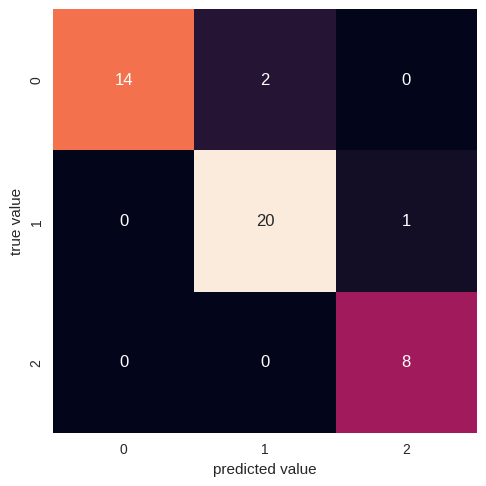

In [17]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, dfc.predict(X_test))

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [20]:
print(classification_report(y_test, dfc.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

It seems that Decision Tree Classifer is much more prone to overfitting compared to SVC. This is seen by the high training accuracy of DTC of 0.99 compared to its validation accuracy of 0.89. While the SVC accuracy is fairly similar with a training accuracy of 0.68 compared to its validation accuracy of 0.67. 

SVC models generally do not work as well as Decision Trees because they require more attention in tuning hyperparameters which are difficult to understand while Decision trees hyperparameters are easy to understand visually. Additionally Decision Trees are more simple to explain to non experts or non technical shareholders.

In Step 5.2, 3 samples were incorrectly classified in the decision tree model

In this dataset, I believe that maximizing precision is more important because getting a false positive in this dataset is not detrimental compared to say like a email spam detection system.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

The dataset is sourced from UCI. I completed the steps in the order presented. I used generative AI to help me understand the differences between recall and precision. I entered in "Explain the differences between recall and precision and the applications of either". It demonstrated the formula to calculate both and significance of both metrics and when one should be wieghted higher than another in a machine learning problem. Besides my understanding of recall and precision, I did not have many challenges with programming due to the examples provided in the lecture notes and example notebooks.

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


In both regression and classification models, I noticed that the standard Decision Tree models tends to overfit the data. The Gradient boosting worked the best due to having many trees work together to correct the mistakes of another tree. The tree based models hyperparameters are quite easy to understand and have simple syntax: for example max_depth simply refers to the max depth of the trees in each model. On the other hand hyperparameters of SVC are quite confusing. 

Using more shallow trees is better on a computational sense and by the examples in this workbook for accuracy as well. Gradient Boosting had the highest accuracy of 92% followed by Random Forest with an accuracy of 84%.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


I liked learning about the different tree based models because they are some of the most popular models used in machine learning. They are quite easy to represent visually. I found challenging whether the cross_validate function needed to be tested on the test split from before but because it creates folds in the function to train and test, it is not needed.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [26]:
# TO DO: ADD YOUR CODE HERE

from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

lsvc = LinearSVC(max_iter=5000)
lsvc_train_accuracy, lsvc_test_accuracy = get_accuracy(lsvc, X_train, y_train)

results = pd.DataFrame({
    "Training": lsvc_train_accuracy,
    "Validation": lsvc_test_accuracy
}, index=['SVC'])

print(results)

     Training  Validation
SVC  0.907812    0.910256


Text(168.97222222222223, 0.5, 'true value')

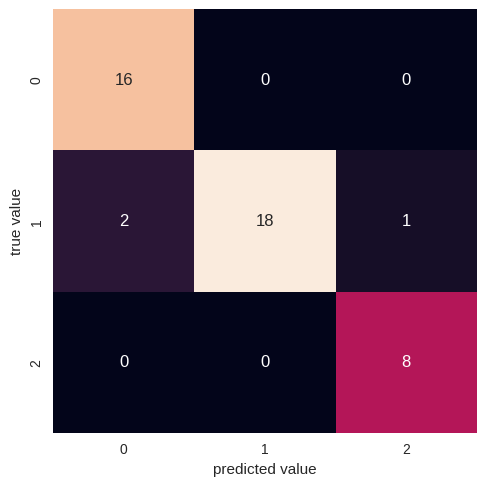

In [27]:
mat = confusion_matrix(y_test, lsvc.predict(X_test))

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [28]:
print(classification_report(y_test, lsvc.predict(X_test)))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        16
           2       1.00      0.86      0.92        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45



*ANSWER HERE*

It performed higher than the Decision Tree model with a validation accuracy of 0.91 anda f1-score of 0.94 with also 3 incorrectly classified samples. I believe that LinearSVC is a good model for this dataset as it did not overfit as much as the Decision Tree classfier and it seems to perform well on high-dimensional datasets such as this one with 13 features/ 